In [4]:
!pip install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [0]:
from sklearn import datasets

In [0]:
n_pts=500
X,y=datasets.make_circles(n_samples=n_pts,random_state=123,noise=0.1,factor=0.2)
x_data=torch.tensor(X)
y_data=torch.tensor(y.reshape(500,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

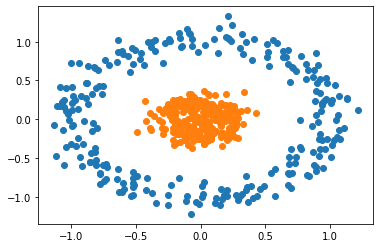

In [21]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self,input_size,H1,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,H1)
    self.linear2=nn.Linear(H1,output_size)
  def forward(self,x):
    x==torch.sigmoid(self.linear(x))
    x=torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    pred=self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0

In [23]:
torch.manual_seed(2)
model=Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [25]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_data.float())
  loss=criterion(y_pred,y_data.float())
  print('epoch:',i,'loss:',loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

RuntimeError: ignored

In [30]:
y_data.shape
x_data.shape

torch.Size([500, 2])

In [31]:
x_data.shape

torch.Size([500, 2])